------豆毎の各主成分への寄与率------
                                     pc1       pc2       pc3
マラウイ ミスク チノンゴ AA               -0.813540  0.395357 -0.331620
ベトナム アラビカ G-1 エバーグリーン           1.179024 -0.315595 -0.646241
ケニア ジャングル エステート Top AA         -1.768127  0.066715 -1.055613
ブルンジ カルシ ブルボン                  -1.379151  0.888686 -0.651133
ウガンダ ブルーナイル AA【特別価格             1.179024 -0.315595 -0.646241
コロンビア ブカラマンガ エル・パライーソ SP       -0.813540  0.395357 -0.331620
コロンビア アンジェリカSP                 -0.489039 -0.535425 -1.053167
ハワイコナ EX ファンシー                 -0.777380 -1.182907  0.379514
ジャマイカ　ブルーマウンテン No.1 Mavis Bank -0.204381 -1.554683  0.858547
ザンビア NCLL農園 AAA                -1.342992 -0.689578  0.060001
バリ神山 デカフェ≪カフェインレスコーヒー≫          0.148436  0.845552  0.551893
マンデリン デカフェ≪カフェインレスコーヒー≫        -0.276700  1.601846 -0.563721
エチオピア シダモG-4 デカフェ≪カフェインレスコーヒー≫  1.179024 -0.315595 -0.646241
コロンビア デカフェ≪カフェインレスコーヒー≫        -0.100064  0.286546 -0.648687
ブラジル デカフェ ≪カフェインレスコーヒー≫         0.429388  1.371481 -1.040307

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:99: FutureWarning: read_table is deprecated, use read_csv instead.


<Figure size 432x432 with 0 Axes>

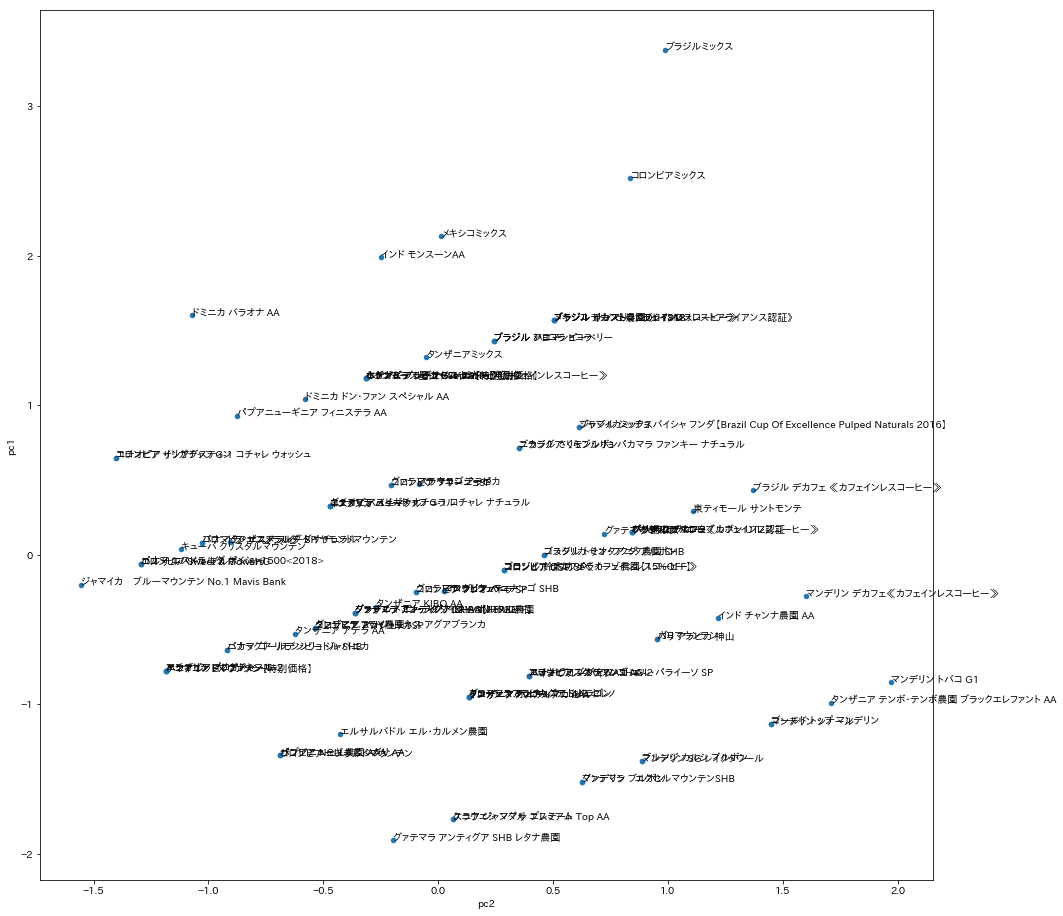

<Figure size 432x288 with 0 Axes>

In [9]:
import pandas as pd
import codecs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib 
from matplotlib.font_manager import FontProperties
#matplotlib.font_manager._rebuild()

font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

#前処理:
def settings(_df):
    #行列天地
    df1 = _df.T
    #headerの差替え
    df2 = df1.drop(index='tasty')
    df2.columns = ['sweety', 'acidity', 'bitter','rich']
    #NaNの処理
    df3 = df2.dropna(how='any')
    #object->int
    df3 = df3.astype(int)

    return df3

#クラスタリングの結果を主成分分析のプロット上にマッピング
def PCAMapping(_df):

    #主成分分析
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    pca.fit(_df)
    feature = pca.transform(_df)
    plt.figure(figsize=(6,6))

    def describe(feature, _df, pca):
        pca_df = pd.DataFrame(feature)
        pca_df.index = _df.index
        pca_df.columns = ['pc1', 'pc2', 'pc3']
        print('------豆毎の各主成分への寄与率------')
        print(pca_df.head(30))
        print('------各主成分毎の説明分散率------')
        print(pca.explained_variance_ratio_)

        print('------豆ごとの主成分プロット------')
        ax = pca_df.plot(kind='scatter', x='pc2', y='pc1', figsize=(16,16))
        for i , bean in enumerate(pca_df.index):
            ax.annotate(
                bean,
                (pca_df.iloc[i].pc2, pca_df.iloc[i].pc1),
                #fontname='sans-serif'
            )


    def mapping2(_df, pca):
        #PCA1とPCA２における観測変数の寄与度をプロット
        for x, y, name in zip(pca.components_[0], pca.components_[1], _df.columns[0:]):
            plt.text(x,y,name)
        plt.scatter(pca.components_[0],pca.components_[1],alpha=0.8)
        plt.xlabel("pc1")
        plt.ylabel("pc2")
    
        
    def mapping5(pca):
        #各主成分の累積寄与と説明分散
        x = ['PC%02s' %i for i in range(1, len(pca.explained_variance_ratio_)+1)]
        y = pca.explained_variance_ratio_
        cum_y = np.cumsum(y)
        plt.bar(x,y, align="center", color="green")
        plt.plot(x, cum_y, color="magenta", marker="o")
        for i, j in zip(x,y):
            plt.text(i,j,'%.2f' % j, ha='center', va='bottom', fontsize=14)
        plt.ylim([0,1])
        plt.ylabel('Explained Variance Rate', fontsize = 14)
        plt.tick_params(labelsize = 14)
        plt.tight_layout()
        plt.grid()        
        
    describe(feature, _df, pca)
    #mapping2(_df,pca)
    plt.figure()
    #mapping5(pca)
    plt.show()

"""
main処理
"""
csv_name = '/home/ubuntu/analysis/coffee_DataSet.csv'
cls_nums = 4


with codecs.open(csv_name, "r", "UTF-8", "ignore") as file:

    df_org = pd.read_table(
        file,
        delimiter=",",)
    
    df_new = settings(df_org)    

    #主成分分析 2次元にクラスタで色分けされたデータを二次元にプロッティング
    PCAMapping(df_new)




